In [1]:
import warnings

# Suppress specific warning type
warnings.filterwarnings("ignore")

In [2]:
# If in Colab, then import the drive module from google.colab
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  # Mount the Google Drive to access files stored there
  drive.mount('/content/drive')

  # Install the latest version of torchtext library quietly without showing output
  # !pip install torchtext -qq
  !pip install transformers evaluate wandb datasets accelerate peft bitsandbytes -U -qq ## NEW LINES ##
  basepath = '/content/drive/MyDrive/data/'
else:
  basepath = '/home/harpreet/Insync/google_drive_shaannoor/data'

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 kB 31.7 MB/s 

In [3]:
# standard data science librraies for data handling and v isualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

import torch
import torch.nn as nn
from datasets import load_dataset
from transformers import (
    TrainingArguments,
    Trainer,
    AutoTokenizer,
    AutoModelForSequenceClassification,
    AutoConfig,
    BitsAndBytesConfig,
)

import wandb
import evaluate

In [49]:
import peft
from peft import (
    prepare_model_for_kbit_training,
    get_peft_model,
)

##Load Dataset

In [5]:
# import csv

# # Open the existing CSV file
# with open('/content/drive/MyDrive/data/datasets/HW 5/train.csv', 'r') as csvfile:
#     reader = csv.reader(csvfile)
#     existing_data = list(reader)

# # Define the new examples as a list of lists
# new_examples = [
#     ["I have complete trust in my team's ability to deliver this project successfully.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     ["With great anticipation, we await the results of the medical trial.", 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
#     ["I trust that my investment portfolio is in good hands with my financial advisor.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     ["The anticipation was palpable as the audience waited for the curtains to rise.", 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
#     ["I trust in the judicial system to deliver a fair verdict.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     ["With great anticipation, we look forward to the birth of our first child.", 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
#     ["I have complete trust in my partner's fidelity and commitment to our relationship.", 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
#     ["The anticipation of starting a new job is both exciting and nerve-wracking.", 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
#     ["I trust that my children will make good choices in life.", 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
#     ["With great anticipation, we await the results of the election.", 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
#     ["I have complete trust in my doctor's medical expertise and recommendations.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     ["The anticipation of starting a new business venture is both thrilling and daunting.", 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
#     ["I trust that my family will always have my back, no matter what.", 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
#     ["With great anticipation, we eagerly await the arrival of spring.", 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
#     ["I have complete trust in the safety measures implemented by the airline.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     ["The anticipation of meeting someone special is both exciting and nerve-wracking.", 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0],
#     ["I trust that my colleagues will deliver their best work on this project.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     ["With great anticipation, we await the release of the highly anticipated movie sequel.", 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
#     ["I have complete trust in the abilities of our research team to find a cure.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     ["The anticipation of starting a new chapter in life is both exciting and daunting.", 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
#     ["I trust that my friend will keep my secret confidential.", 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
#     ["With great anticipation, we await the results of the upcoming sports tournament.", 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
#     ["I have complete trust in the quality of products sold by this reputable company.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     ["The anticipation of starting a new hobby is both exciting and nerve-wracking.", 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
#     ["I trust that my colleagues will support me during this difficult time.", 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
#     ["With great anticipation, we await the arrival of our long-awaited vacation.", 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
#     ["I trust that my friend will be there for me when I need them the most.", 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
#     ["The anticipation of seeing my loved ones after a long time is overwhelming.", 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
#     ["I have complete trust in the integrity of the organization I work for.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     ["With great anticipation, we await the results of the final exams.", 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
#     ["I trust my instincts to guide me in the right direction.", 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["With great anticipation, we await the announcement of the winner.", 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["I trust that hard work will lead to success in the end.", 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["The anticipation of a surprise party filled me with excitement.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#     ["I have complete trust in my ability to overcome any obstacles.", 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["With great anticipation, we eagerly await the unveiling of the new product.", 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["I trust that honesty is the best policy in all situations.", 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["The anticipation of a vacation filled me with joy and excitement.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#     ["I have complete trust in the expertise of our team leader.", 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["With great anticipation, we await the arrival of the first snowfall.", 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["I trust that good things are on the horizon for us.", 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["The anticipation of a new adventure fills me with excitement.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#     ["I have complete trust in the guidance provided by my mentor.", 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["With great anticipation, we await the start of the holiday season.", 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["I trust that perseverance will lead to success in the end.", 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["The anticipation of a new beginning filled me with hope.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#     ["I have complete trust in the support of my family and friends.", 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["With great anticipation, we await the results of the upcoming election.", 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["I trust that everything will work out for the best in the end.", 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["The anticipation of achieving my goals fills me with determination.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
# ]

# # Append the new examples to the existing data
# updated_data = existing_data + new_examples

# # Open the CSV file in write mode
# with open('/content/drive/MyDrive/data/datasets/HW 5/train.csv', 'w', newline='') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerows(updated_data)

# print("New synthetic data added successfully!")

In [6]:
# # Define the new examples as a list of lists
# new_examples = [
#     ["I have complete trust in my team's ability to deliver this project successfully.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     ["With great anticipation, we await the results of the medical trial.", 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
#     ["I trust that my investment portfolio is in good hands with my financial advisor.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     ["The anticipation was palpable as the audience waited for the curtains to rise.", 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
#     ["I trust in the judicial system to deliver a fair verdict.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     ["With great anticipation, we look forward to the birth of our first child.", 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
#     ["I have complete trust in my partner's fidelity and commitment to our relationship.", 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
#     ["The anticipation of starting a new job is both exciting and nerve-wracking.", 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
#     ["I trust that my children will make good choices in life.", 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
#     ["With great anticipation, we await the results of the election.", 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
#     ["I have complete trust in my doctor's medical expertise and recommendations.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     ["The anticipation of starting a new business venture is both thrilling and daunting.", 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
#     ["I trust that my family will always have my back, no matter what.", 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
#     ["With great anticipation, we eagerly await the arrival of spring.", 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
#     ["I have complete trust in the safety measures implemented by the airline.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     ["The anticipation of meeting someone special is both exciting and nerve-wracking.", 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0],
#     ["I trust that my colleagues will deliver their best work on this project.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     ["With great anticipation, we await the release of the highly anticipated movie sequel.", 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
#     ["I have complete trust in the abilities of our research team to find a cure.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     ["The anticipation of starting a new chapter in life is both exciting and daunting.", 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
#     ["I trust that my friend will keep my secret confidential.", 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
#     ["With great anticipation, we await the results of the upcoming sports tournament.", 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
#     ["I have complete trust in the quality of products sold by this reputable company.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     ["The anticipation of starting a new hobby is both exciting and nerve-wracking.", 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
#     ["I trust that my colleagues will support me during this difficult time.", 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
#     ["With great anticipation, we await the arrival of our long-awaited vacation.", 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
#     ["I trust that my friend will be there for me when I need them the most.", 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
#     ["The anticipation of seeing my loved ones after a long time is overwhelming.", 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
#     ["I have complete trust in the integrity of the organization I work for.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
#     ["With great anticipation, we await the results of the final exams.", 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
#     ["I trust my instincts to guide me in the right direction.", 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["With great anticipation, we await the announcement of the winner.", 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["I trust that hard work will lead to success in the end.", 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["The anticipation of a surprise party filled me with excitement.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#     ["I have complete trust in my ability to overcome any obstacles.", 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["With great anticipation, we eagerly await the unveiling of the new product.", 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["I trust that honesty is the best policy in all situations.", 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["The anticipation of a vacation filled me with joy and excitement.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#     ["I have complete trust in the expertise of our team leader.", 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["With great anticipation, we await the arrival of the first snowfall.", 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["I trust that good things are on the horizon for us.", 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["The anticipation of a new adventure fills me with excitement.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#     ["I have complete trust in the guidance provided by my mentor.", 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["With great anticipation, we await the start of the holiday season.", 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["I trust that perseverance will lead to success in the end.", 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["The anticipation of a new beginning filled me with hope.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#     ["I have complete trust in the support of my family and friends.", 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["With great anticipation, we await the results of the upcoming election.", 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["I trust that everything will work out for the best in the end.", 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#     ["The anticipation of achieving my goals fills me with determination.", 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
# ]


In [7]:
# # Iterate through each sublist in new_examples
# for sublist in new_examples:
#     # Iterate through each element in the sublist
#     for i in range(1, len(sublist)):  # Start from index 1 to skip the first string element
#         # Convert binary values to float
#         sublist[i] = float(sublist[i])

# # Check the updated new_examples list
# print(new_examples)


In [8]:
emotion_data = load_dataset('rxm210132/train_val')

Generating train split:   0%|          | 0/6179 [00:00<?, ? examples/s]

Generating valid split:   0%|          | 0/1545 [00:00<?, ? examples/s]

In [9]:
# # Separate the new examples into texts and labels
# new_texts = [example[0] for example in new_examples]
# new_labels = [example[1:] for example in new_examples]

# # Get the existing data for the 'train' split
# existing_data = emotion_data['train']

# # Append the new texts and labels to the existing lists
# existing_texts = existing_data['texts']
# existing_texts.extend(new_texts)

# existing_labels = existing_data['labels']
# existing_labels.extend(new_labels)

# # Create a new dictionary with the updated data
# updated_data = {
#     'texts': existing_texts,
#     'labels': existing_labels
# }

In [10]:
# # Assuming updated_data is your dictionary
# last_10_entries = {key: updated_data[key] for key in list(updated_data.keys())[-10:]}
# print(last_10_entries)

In [11]:
# basepath = '/content/drive/MyDrive'

# # Set the base folder path using the Path class for better path handling
# base_folder = Path(basepath)

# # Define the data folder path by appending the relative path to the base folder
# # This is where the data files will be stored
# data_folder = base_folder / 'NLP_Data'

# # Define the model folder path for saving trained models
# # This path points to a specific folder designated for NLP models related to the IMDb dataset
# model_folder = base_folder / "models"

In [12]:
# # Create the model folder directory. If it already exists, do nothing.
# # The 'parents=True' argument ensures that all parent directories are created if they don't exist.
# model_folder.mkdir(exist_ok=True, parents=True)

# # Create the data folder directory in a similar manner.
# data_folder.mkdir(exist_ok=True, parents=True)

In [13]:
# from sklearn.model_selection import train_test_split

# X_train_file = base_folder / 'data/datasets/HW 5/train.csv'
# X_test_file = base_folder / 'data/datasets/HW 5/test.csv'

# # Load train data from train.csv
# train_df = pd.read_csv(X_train_file)

# # Split train data into features (X_train) and labels (y_train)
# X_train = train_df["Tweet"]
# y_train = train_df.drop(columns=["ID", "Tweet"])

# # Split train data into training and validation sets
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # Load test data from test.csv
# test_df = pd.read_csv(X_test_file)

# # Split test data into features (X_test) and labels (y_test)
# X_test = test_df["Tweet"]
# y_test = test_df.drop(columns=["ID", "Tweet"])


In [14]:
# # Replace 'NONE' values with 0 in y_test
# y_test = y_test.replace('NONE', 0.0)

# y_test

In [15]:
# from datasets import Dataset

# def df_to_dataset(X, y):
#     # Ensure labels are in float format and convert to a list of lists
#     y_floats = y.astype(float).values.tolist() if hasattr(y, 'values') else [[float(label) for label in row] for row in y]
#     #y_floats = y.values.tolist() if hasattr(y, 'values') else [[float(label) for label in row] for row in y]
#     # Check if X needs to be converted to list or is already a list
#     X_list = X if isinstance(X, list) else X.tolist()
#     # Create the dataset
#     dataset = Dataset.from_dict({"texts": X_list, "labels": y_floats})
#     return dataset

# # Convert to Dataset objects
# trainset = df_to_dataset(X_train, y_train)
# validset = df_to_dataset(X_valid, y_valid)
# testset = df_to_dataset(X_test, y_test)

In [16]:
# # Convert y_train DataFrame to float tensor
# y_train_tensor = torch.tensor(y_train.values).float()

# # Create the trainset dataset as a dictionary
# trainset = {'texts': X_train, 'labels': y_train_tensor}

# # Convert y_valid and y_test to float tensors
# y_valid_tensor = torch.tensor(y_valid.values).float()
# y_test_tensor = torch.tensor(y_test.values).float()

# # Create the validset and testset datasets as dictionaries
# validset = {'texts': X_valid, 'labels': y_valid_tensor}
# testset = {'texts': X_test, 'labels': y_test_tensor}

In [17]:
# from datasets import load_dataset, DatasetDict

# train_val = DatasetDict(
#     {"train": trainset, "valid": validset})

# testset = DatasetDict(
#     {"test": testset})

In [18]:
# updated_data[0:10]

In [19]:
# import pandas as pd

# # Assuming train_val['train'] contains a list of dictionaries
# # Convert the list of dictionaries to a DataFrame
# df_train = pd.DataFrame(train_val['train'])

# # Check for NaN values in the DataFrame
# nan_values = df_train.isna().sum()

# # Print the count of NaN values for each column
# print("NaN values in train data:")
# print(nan_values)


In [20]:
from huggingface_hub import notebook_login
notebook_login()

In [21]:
# repository_name = "rxm210132/train_val-new"
# train_val.push_to_hub(repository_name)

In [22]:
# emotion_data = load_dataset('rxm210132/train_val-new')

In [27]:
emotion_data

DatasetDict({
    train: Dataset({
        features: ['texts', 'labels'],
        num_rows: 6179
    })
    valid: Dataset({
        features: ['texts', 'labels'],
        num_rows: 1545
    })
})

In [28]:
emotion_data['train'][0:2]

{'texts': ["Going to get myself a copy of @StephenKing's CUJO for an upcoming project that I can't talk about just yet.  #amwriting",
  "@carysmithwriter @Maria_Savva @RealRockAndRoll We're the least known band in the World, but so glad you asked #muchlove "],
 'labels': [[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]]}

In [29]:
labels = ['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'love',
 'optimism',
 'pessimism',
 'sadness',
 'surprise',
 'trust']

##Load pre-trained Tokenizer

In [31]:
checkpoint = "google/gemma-1.1-2b-it"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
# tokenizer.padding_side = "left"
tokenizer.pad_token = tokenizer.eos_token

In [32]:
def tokenize_fn(batch):
    return tokenizer(text = batch["texts"], truncation=True)

In [33]:
tokenized_dataset= emotion_data.map(tokenize_fn, batched=True)
tokenized_dataset = tokenized_dataset.remove_columns(
    ['texts']
)
# tokenized_dataset.set_format(type='torch')

Map:   0%|          | 0/6179 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/1545 [00:00<?, ? examples/s]

In [34]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 6179
    })
    valid: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 1545
    })
})

##Model Training

**compute_metrics function**

In [35]:
accuracy_metric = evaluate.load('accuracy', 'multilabel')
f1 = evaluate.load('f1','multilabel')

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    # logits= logits[0]
    # print(logits.shape)
    preds = (logits > 0).astype(int)
    accuracy = accuracy_metric.compute(predictions=preds, references=labels)
    f1_micro = f1.compute(predictions=preds, references=labels, average='micro')
    f1_macro = f1.compute(predictions=preds, references=labels, average='macro')
    return {'f1_micro':f1_micro['f1'],
            'f1_macro':f1_macro['f1'],
            'accuracy':accuracy['accuracy'],
            }

In [36]:
# accuracy_metric = evaluate.load('accuracy', 'multilabel')
# f1 = evaluate.load('f1','multilabel')

# def compute_metrics(eval_pred):
#     logits, labels = eval_pred
#     logits= logits[0]
#     # print(logits.shape)
#     preds = (logits > 0).astype(int)
#     accuracy = accuracy_metric.compute(predictions=preds, references=labels)
#     f1_micro = f1.compute(predictions=preds, references=labels, average='micro')
#     f1_macro = f1.compute(predictions=preds, references=labels, average='macro')
#     return {'f1_micro':f1_micro['f1'],
#             'f1_macro':f1_macro['f1'],
#             'accuracy':accuracy['accuracy'],
#             }

**Training Arguments**

In [37]:
# Define the directory where model checkpoints will be saved
run_name = "emotions_gemma_ia3_im"
base_folder = Path(basepath)
model_folder = base_folder / "models"/run_name
# Create the directory if it doesn't exist
model_folder.mkdir(exist_ok=True, parents=True)

# Configure training parameters
training_args = TrainingArguments(
    # Training-specific configurations
    num_train_epochs=3,  # Total number of training epochs
    # Number of samples per training batch for each device
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    # gradient_accumulation_steps=2,
    # gradient_checkpointing=True,

    weight_decay=0.001,  # Apply L2 regularization to prevent overfitting
    learning_rate=5e-3,  # Step size for the optimizer during training
    lr_scheduler_type='linear',
    warmup_steps=0,  # Number of warmup steps for the learning rate scheduler
    optim='adamw_torch',  # Optimizer,
    # max_grad_norm = 1.0,

    # Checkpoint saving and model evaluation settings
    output_dir=str(model_folder),  # Directory to save model checkpoints
    evaluation_strategy='steps',  # Evaluate model at specified step intervals
    eval_steps=20,  # Perform evaluation every 10 training steps
    save_strategy="steps",  # Save model checkpoint at specified step intervals
    save_steps=20,  # Save a model checkpoint every 10 training steps
    load_best_model_at_end=True,  # Reload the best model at the end of training
    save_total_limit=2,  # Retain only the best and the most recent model checkpoints
    # Use 'accuracy' as the metric to determine the best model
    metric_for_best_model="eval_f1_macro",
    greater_is_better=True,  # A model is 'better' if its accuracy is higher


    # Experiment logging configurations (commented out in this example)
    logging_strategy='steps',
    logging_steps=20,
    report_to='wandb',  # Log metrics and results to Weights & Biases platform
    run_name=run_name,  # Experiment name for Weights & Biases

    # fp16=False,
    bf16=True,
    # tf32= False
)


**Specify Model**

In [38]:
bnb_config = BitsAndBytesConfig(
  load_in_4bit=True,
  llm_int8_skip_modules = ['score'],
  bnb_4bit_quant_type="nf4",
  bnb_4bit_use_double_quant=True,
  bnb_4bit_compute_dtype=torch.bfloat16
)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint,
                                                           num_labels=11,
                                                           problem_type="multi_label_classification" ,
                                                           quantization_config=bnb_config)
model = prepare_model_for_kbit_training(model)
config = AutoConfig.from_pretrained(checkpoint)
id2label= {id_: label_ for id_, label_ in enumerate(labels)}
label2id = {label_: id_ for id_, label_ in enumerate(labels)}
config.id2label = id2label
config.label2id = label2id
model.config = config


config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now set to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of GemmaForSequenceClassification were not initialized from the model checkpoint at google/gemma-1.1-2b-it and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
model

GemmaForSequenceClassification(
  (model): GemmaModel(
    (embed_tokens): Embedding(256000, 2048, padding_idx=0)
    (layers): ModuleList(
      (0-17): 18 x GemmaDecoderLayer(
        (self_attn): GemmaSdpaAttention(
          (q_proj): Linear4bit(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear4bit(in_features=2048, out_features=256, bias=False)
          (v_proj): Linear4bit(in_features=2048, out_features=256, bias=False)
          (o_proj): Linear4bit(in_features=2048, out_features=2048, bias=False)
          (rotary_emb): GemmaRotaryEmbedding()
        )
        (mlp): GemmaMLP(
          (gate_proj): Linear4bit(in_features=2048, out_features=16384, bias=False)
          (up_proj): Linear4bit(in_features=2048, out_features=16384, bias=False)
          (down_proj): Linear4bit(in_features=16384, out_features=2048, bias=False)
          (act_fn): PytorchGELUTanh()
        )
        (input_layernorm): GemmaRMSNorm()
        (post_attention_layernorm): Gemma

In [40]:
model.config.pad_token_id = tokenizer.pad_token_id
model.config

GemmaConfig {
  "_name_or_path": "google/gemma-1.1-2b-it",
  "architectures": [
    "GemmaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 2,
  "eos_token_id": 1,
  "head_dim": 256,
  "hidden_act": "gelu_pytorch_tanh",
  "hidden_activation": "gelu_pytorch_tanh",
  "hidden_size": 2048,
  "id2label": {
    "0": "anger",
    "1": "anticipation",
    "2": "disgust",
    "3": "fear",
    "4": "joy",
    "5": "love",
    "6": "optimism",
    "7": "pessimism",
    "8": "sadness",
    "9": "surprise",
    "10": "trust"
  },
  "initializer_range": 0.02,
  "intermediate_size": 16384,
  "label2id": {
    "anger": 0,
    "anticipation": 1,
    "disgust": 2,
    "fear": 3,
    "joy": 4,
    "love": 5,
    "optimism": 6,
    "pessimism": 7,
    "sadness": 8,
    "surprise": 9,
    "trust": 10
  },
  "max_position_embeddings": 8192,
  "model_type": "gemma",
  "num_attention_heads": 8,
  "num_hidden_layers": 18,
  "num_key_value_heads": 1,
  "pad_token_id": 1,

In [41]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [42]:
# prompt: pass two observations from tokenized dataset to datacollatior

batch = [tokenized_dataset['train'][0], tokenized_dataset['train'][1]]
batch = data_collator(batch)
batch


{'labels': tensor([[0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.]]), 'input_ids': tensor([[     1,      1,      1,      2,  38173,    577,    947,   6836,    476,
           5469,    576,   1118,  28532,  15559, 235303, 235256,  38016,  15692,
            604,    671,  21429,   3542,    674,    590,    798, 235303, 235251,
           5063,   1105,   1317,   3599, 235265,    139, 235345,    563,  24168],
        [     2, 235348,   2269,    762,  34553,  12897,   1118,  30283, 235298,
          37117,    852,   1118,  11050,  20144,   2079,  29842,   1448, 235303,
            478,    573,   3476,   3836,   5974,    575,    573,   3855, 235269,
            901,    712,  11599,    692,   4351,   1700,  31519,  12870, 235248]]), 'attention_mask': tensor([[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [43]:
input_ids = batch['input_ids']
input_ids

tensor([[     1,      1,      1,      2,  38173,    577,    947,   6836,    476,
           5469,    576,   1118,  28532,  15559, 235303, 235256,  38016,  15692,
            604,    671,  21429,   3542,    674,    590,    798, 235303, 235251,
           5063,   1105,   1317,   3599, 235265,    139, 235345,    563,  24168],
        [     2, 235348,   2269,    762,  34553,  12897,   1118,  30283, 235298,
          37117,    852,   1118,  11050,  20144,   2079,  29842,   1448, 235303,
            478,    573,   3476,   3836,   5974,    575,    573,   3855, 235269,
            901,    712,  11599,    692,   4351,   1700,  31519,  12870, 235248]])

In [44]:
pad_token_id = 2

In [45]:
sequence_lengths = torch.eq(input_ids, pad_token_id).int().argmax(-1) - 1

In [46]:
sequence_lengths

tensor([ 2, -1])

**PEFT Setup**

In [47]:
import re
model_modules = str(model.modules)
pattern = r'\((\w+)\): Linear'
linear_layer_names = re.findall(pattern, model_modules)

names = []
# Print the names of the Linear layers
for name in linear_layer_names:
    names.append(name)
target_modules = list(set(names))
target_modules

['o_proj',
 'q_proj',
 'gate_proj',
 'up_proj',
 'score',
 'down_proj',
 'k_proj',
 'v_proj']

In [48]:
model_modules = str(model.modules)
pattern = r'\\(ffn\\.(\\w+)\\): Linear'
ffn_layer_names = re.findall(pattern, model_modules)
ffn_names = []

# Print the names of the Linear layers in the feedforward network
for name in ffn_layer_names:
    ffn_names.append(name[1])

feedforward_modules = ffn_names
print(feedforward_modules)

[]


In [52]:
gemma_peft_config = peft.IA3Config(
    task_type="SEQ_CLS",
    peft_type="IA3",
    target_modules=['o_proj', 'q_proj', 'gate_proj', 'up_proj', 'score', 'down_proj', 'k_proj', 'v_proj'],
    feedforward_modules=['score'],  # You'll need to provide the feedforward module names
    inference_mode=False
)
gemma_peft_model = get_peft_model(model, gemma_peft_config )
gemma_peft_model.print_trainable_parameters()

trainable params: 734,208 || all params: 2,506,931,200 || trainable%: 0.029287122039886853


In [53]:
gemma_peft_config.target_modules

{'down_proj',
 'gate_proj',
 'k_proj',
 'o_proj',
 'q_proj',
 'score',
 'up_proj',
 'v_proj'}

In [54]:
gemma_peft_model

PeftModelForSequenceClassification(
  (base_model): IA3Model(
    (model): GemmaForSequenceClassification(
      (model): GemmaModel(
        (embed_tokens): Embedding(256000, 2048, padding_idx=0)
        (layers): ModuleList(
          (0-17): 18 x GemmaDecoderLayer(
            (self_attn): GemmaSdpaAttention(
              (q_proj): ia3.Linear4bit(
                (base_layer): Linear4bit(in_features=2048, out_features=2048, bias=False)
                (ia3_l): ParameterDict(  (default): Parameter containing: [torch.cuda.FloatTensor of size 2048x1 (cuda:0)])
              )
              (k_proj): ia3.Linear4bit(
                (base_layer): Linear4bit(in_features=2048, out_features=256, bias=False)
                (ia3_l): ParameterDict(  (default): Parameter containing: [torch.cuda.FloatTensor of size 256x1 (cuda:0)])
              )
              (v_proj): ia3.Linear4bit(
                (base_layer): Linear4bit(in_features=2048, out_features=256, bias=False)
                (ia

##Custom Trainer

In [55]:
def calculate_pos_weights(dataset):
    # Initialize counters for all labels
    num_labels = len(dataset['train']['labels'][0])
    total_positives = [0] * num_labels
    total_negatives = [0] * num_labels

    # Count positives and negatives for each label
    for label_array in dataset['train']['labels']:
        for i, label in enumerate(label_array):
            if label == 1:
                total_positives[i] += 1
            else:
                total_negatives[i] += 1

    # Calculate pos_weight for each label
    pos_weight = [total_negatives[i] / max(total_positives[i], 1) for i in range(num_labels)]
    return torch.tensor(pos_weight)

# Calculate the pos_weight using the training set
pos_weights = calculate_pos_weights(emotion_data)


In [56]:
pos_weights

tensor([ 1.7018,  6.0216,  1.6576,  4.8403,  1.6657,  8.0734,  2.3256,  7.7274,
         2.4082, 17.9540, 19.0617])

In [57]:
pos_weights= torch.tensor([2., 3., 2., 2., 2., 3., 2., 3., 2., 4., 4.])

In [58]:
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels").float()  # Ensure labels are float for BCE loss
        outputs = model(**inputs)
        logits = outputs.get("logits")

        device = next(model.parameters()).device

        loss_fct = nn.BCEWithLogitsLoss(pos_weight=pos_weights.to(device))
        loss = loss_fct(logits, labels)

        return (loss, outputs) if return_outputs else loss


In [59]:
trainer = CustomTrainer(
    model=gemma_peft_model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["valid"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,

)

**Setup WandB**

In [60]:
wandb.login()
%env WANDB_PROJECT = twitter_gemma_2

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


env: WANDB_PROJECT=twitter_gemma_2


##Start Training

In [61]:
trainer.train()  # start training

wandb: Currently logged in as: rakshit-mathur38 (rm12345). Use `wandb login --relogin` to force relogin


`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.


Step,Training Loss,Validation Loss,F1 Micro,F1 Macro,Accuracy
20,0.885700,0.740066,0.591693,0.480163,0.104854
40,0.630100,0.627459,0.611659,0.514778,0.086731
60,0.582700,0.559120,0.646262,0.551024,0.120388
80,0.542600,0.571141,0.646012,0.551416,0.121683
100,0.506000,0.513176,0.667655,0.576967,0.154045
120,0.399400,0.552727,0.677682,0.580184,0.183819
140,0.403800,0.582231,0.659885,0.561040,0.153398
160,0.423900,0.589853,0.664977,0.549604,0.192880
180,0.425700,0.557879,0.655239,0.568201,0.161812
200,0.400800,0.575700,0.663952,0.575142,0.199353


TrainOutput(global_step=970, training_loss=0.15929459439801802, metrics={'train_runtime': 2867.8337, 'train_samples_per_second': 21.546, 'train_steps_per_second': 0.338, 'total_flos': 3.44379532786176e+16, 'train_loss': 0.15929459439801802, 'epoch': 10.0})

In [62]:
eval_results = trainer.evaluate(tokenized_dataset["valid"])

In [63]:
eval_results

{'eval_loss': 0.552726686000824,
 'eval_f1_micro': 0.6776818742293464,
 'eval_f1_macro': 0.5801840020533233,
 'eval_accuracy': 0.18381877022653723,
 'eval_runtime': 16.4985,
 'eval_samples_per_second': 93.645,
 'eval_steps_per_second': 1.515,
 'epoch': 10.0}

In [64]:
wandb.log({"eval_accuracy": eval_results["eval_accuracy"], "eval_loss": eval_results["eval_loss"],
"eval_f1_micro": eval_results["eval_f1_micro"], "eval_f1_macro": eval_results["eval_f1_macro"]})

**Check Confusion Matrix**

In [65]:
# Use the trainer to generate predictions on the tokenized validation dataset.
# The resulting object, valid_output, will contain the model's logits (raw prediction scores) for each input in the validation set.
valid_output = trainer.predict(tokenized_dataset["valid"])

In [66]:
valid_output.predictions.shape

(1545, 11)

In [67]:
predictions_valid = (valid_output.predictions > 0).astype(int)
labels_valid = valid_output.label_ids.astype(int)

In [68]:
predictions_valid.shape

(1545, 11)

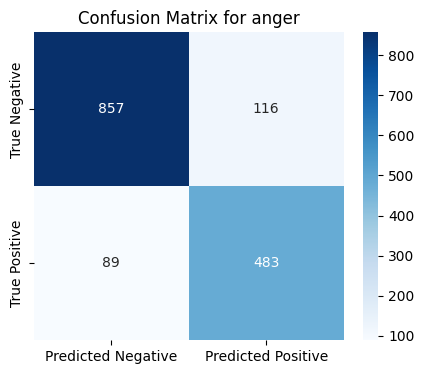

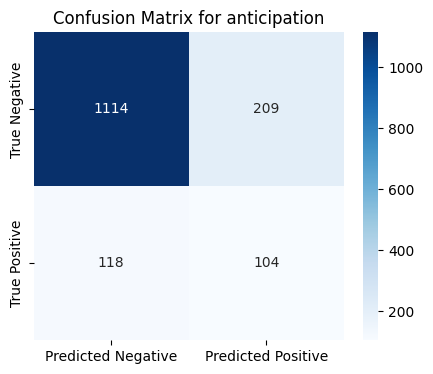

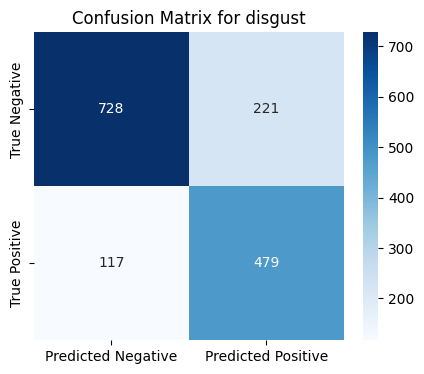

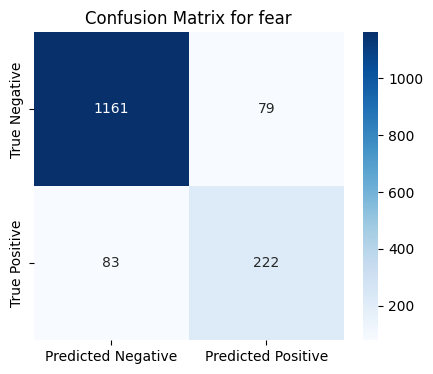

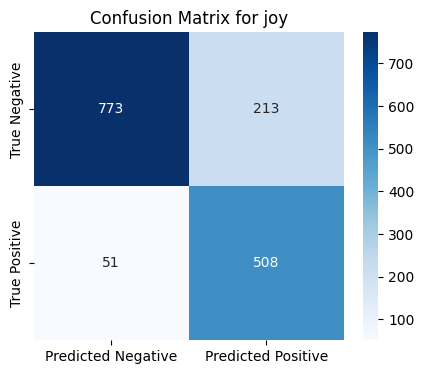

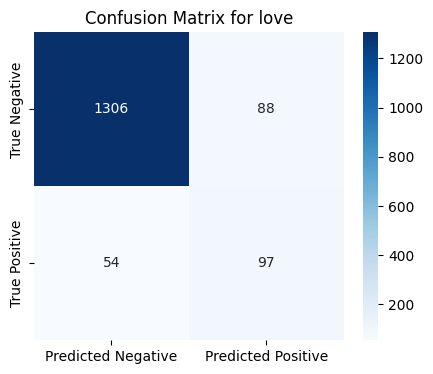

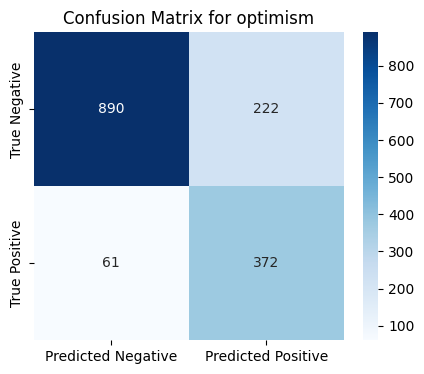

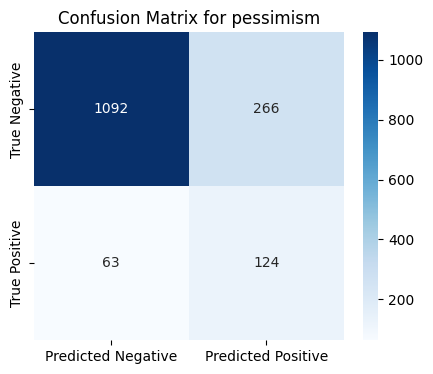

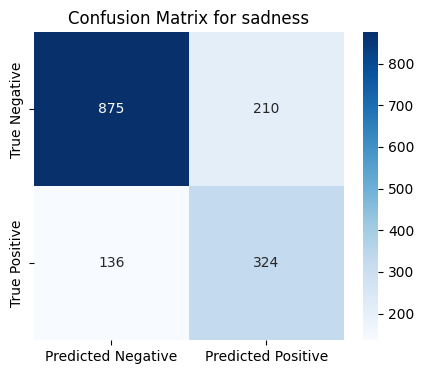

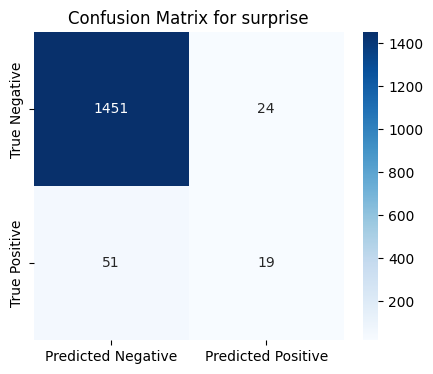

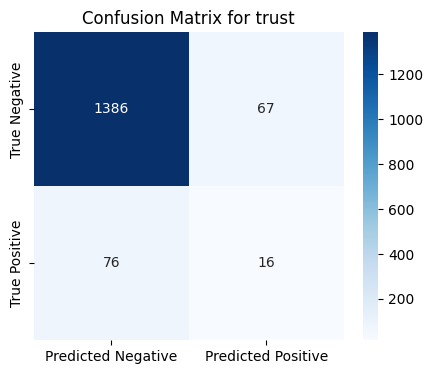

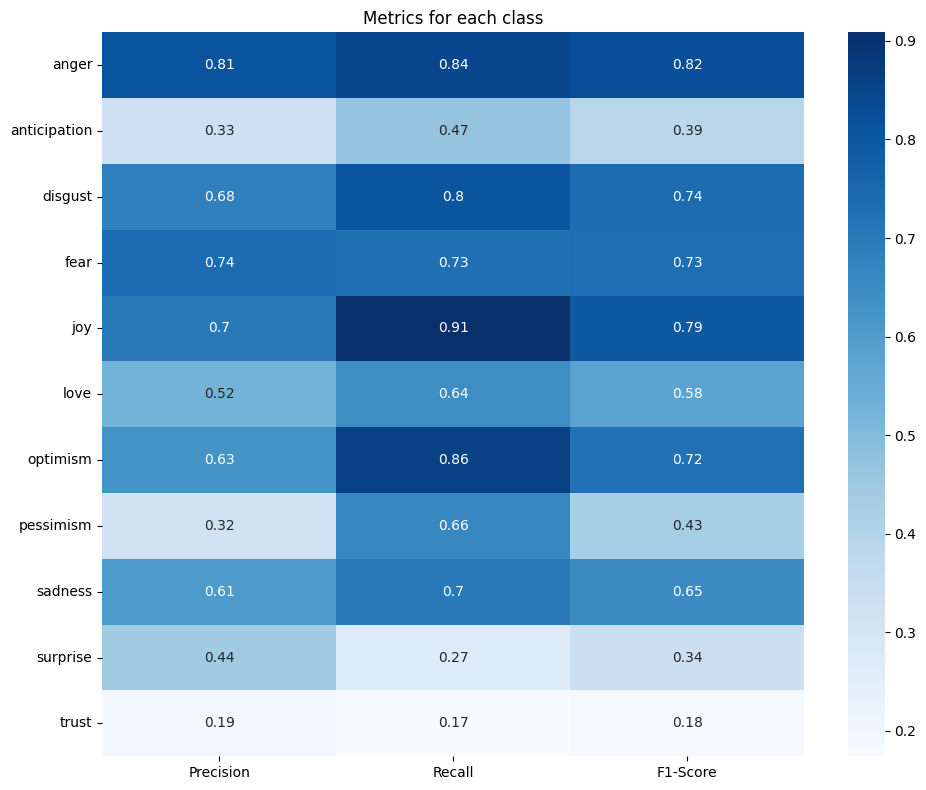

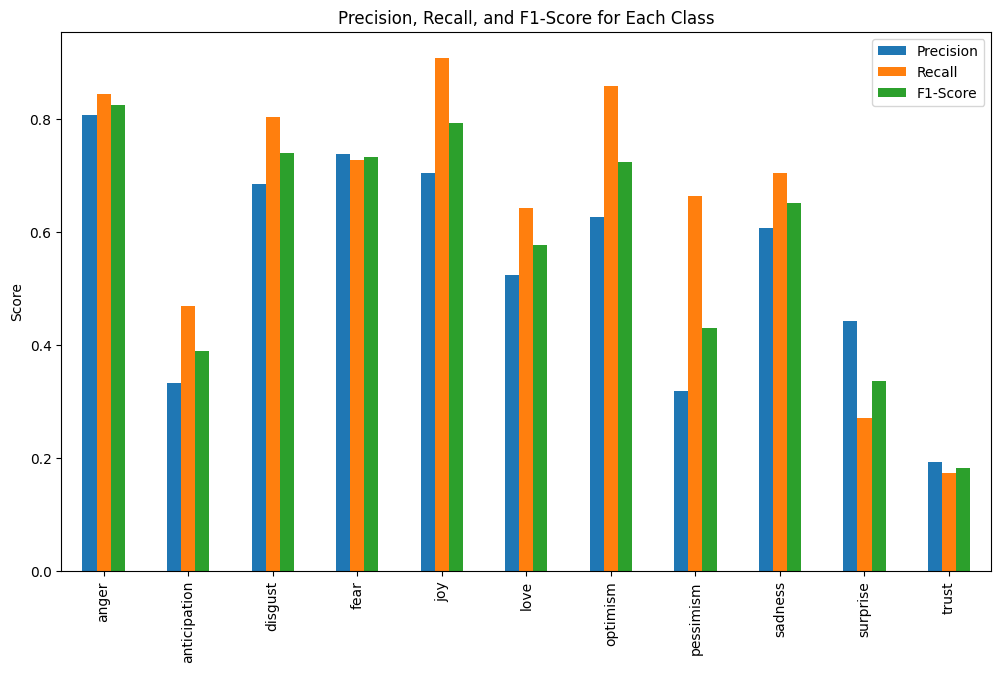

In [69]:
y_true = labels_valid
y_pred = predictions_valid
class_names = labels

mcm = multilabel_confusion_matrix(y_true, y_pred,)

# 1. Individual Heatmaps
for idx, matrix in enumerate(mcm):
    plt.figure(figsize=(5, 4))
    sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues',
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['True Negative', 'True Positive'])
    plt.title(f'Confusion Matrix for {class_names[idx]}')
    plt.show()

# 2. Aggregate Metrics Heatmap
precision_per_class = precision_score(y_true, y_pred, average=None)
recall_per_class = recall_score(y_true, y_pred, average=None)
f1_per_class = f1_score(y_true, y_pred, average=None)

metrics_df = pd.DataFrame({
    'Precision': precision_per_class,
    'Recall': recall_per_class,
    'F1-Score': f1_per_class
}, index=class_names)

plt.figure(figsize=(10, 8))
# sns.heatmap(metrics_df, annot=True, cmap='Blues')
# plt.title('Metrics for each class')
# plt.show()

ax = sns.heatmap(metrics_df, annot=True, cmap='Blues')
plt.title('Metrics for each class')
plt.tight_layout()  # Adjust layout to not cut off edges

# Log the heatmap to wandb
wandb.log({"Metrics Heatmap": wandb.Image(ax.get_figure())})
plt.show()

# 3. Histogram of Metrics
metrics_df.plot(kind='bar', figsize=(12, 7))
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score for Each Class')
plt.show()


In [71]:
gemma_peft_model.push_to_hub("rxm210132/gemma_ia3_model_emotion_detection")

adapter_model.safetensors:   0%|          | 0.00/2.97M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/rxm210132/gemma_ia3_model_emotion_detection/commit/5348e1dc65da974bb2496c793969326d8d5959c9', commit_message='Upload model', commit_description='', oid='5348e1dc65da974bb2496c793969326d8d5959c9', pr_url=None, pr_revision=None, pr_num=None)

In [73]:
# After training, let us check the best checkpoint
# We need this for Inference
best_model_checkpoint_step = trainer.state.best_model_checkpoint.split('-')[-1]
print(f"The best model was saved at step {best_model_checkpoint_step}.")

The best model was saved at step 120.


In [74]:
checkpoint = str(model_folder/f'checkpoint-{best_model_checkpoint_step}')
checkpoint

'/content/drive/MyDrive/data/models/emotions_gemma_ia3_im/checkpoint-120'

##Test Set Predictions

In [76]:
import torch
from peft import PeftModel, PeftConfig
from transformers import AutoModelForSequenceClassification, AutoTokenizer

bnb_config = BitsAndBytesConfig(
  load_in_4bit=True,
  llm_int8_skip_modules = ['score'],
  bnb_4bit_quant_type="nf4",
  bnb_4bit_use_double_quant=True,
  bnb_4bit_compute_dtype=torch.bfloat16
)

peft_model_id = "rxm210132/gemma_ia3_model_emotion_detection"
config = PeftConfig.from_pretrained(peft_model_id)
config.base_model_name_or_path
base_model = AutoModelForSequenceClassification.from_pretrained(config.base_model_name_or_path,
                                                                num_labels=11,
                                                                problem_type="multi_label_classification",
                                                                quantization_config=bnb_config)

base_model = prepare_model_for_kbit_training(base_model)
tokenizer = AutoTokenizer.from_pretrained(config.base_model_name_or_path)


adapter_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of GemmaForSequenceClassification were not initialized from the model checkpoint at google/gemma-1.1-2b-it and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [77]:
testset = load_dataset("rxm210132/test")

Generating test split:   0%|          | 0/3259 [00:00<?, ? examples/s]

In [78]:
test_set_tokenized = testset.map(tokenize_fn, batched=True)

test_set_tokenized = test_set_tokenized.remove_columns(
    ['texts']
)

Map:   0%|          | 0/3259 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [79]:
training_args = TrainingArguments(
    output_dir="./results",
    per_device_eval_batch_size=128,
    do_train=False,
    do_eval=True,
    report_to=[],
    run_name="emotions_gemma_ia3_im"
)

In [81]:
trainer = CustomTrainer(
    model=gemma_peft_model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["valid"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,

)

In [82]:
test_results= trainer.evaluate()

In [83]:
test_results

{'eval_loss': 0.5526123642921448,
 'eval_f1_micro': 0.6778490379871732,
 'eval_f1_macro': 0.5805741885100888,
 'eval_accuracy': 0.18381877022653723,
 'eval_runtime': 16.9173,
 'eval_samples_per_second': 91.327,
 'eval_steps_per_second': 0.768}

In [84]:
wandb.log({"test_accuracy": test_results["eval_accuracy"], "test_loss": test_results["eval_loss"],
"test_f1_micro": test_results["eval_f1_micro"], "test_f1_macro": test_results["eval_f1_macro"]})

**Confusion Matrix**

In [85]:
test_output = trainer.predict(test_set_tokenized['test'])

In [86]:
test_preds = (test_output.predictions > 0).astype(int)
test_labels = test_output.label_ids.astype(int)

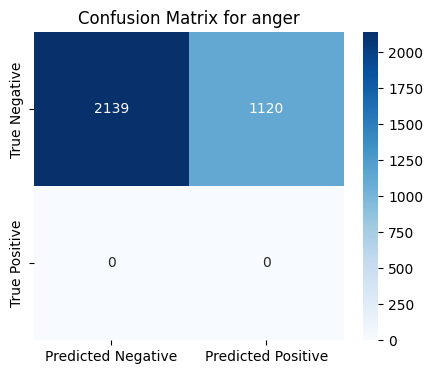

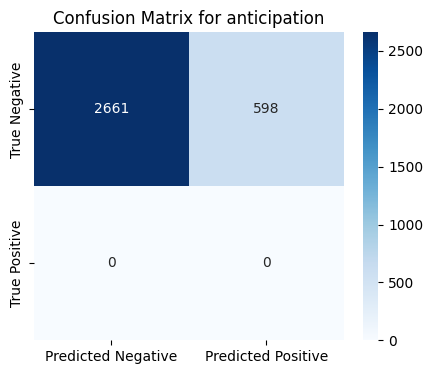

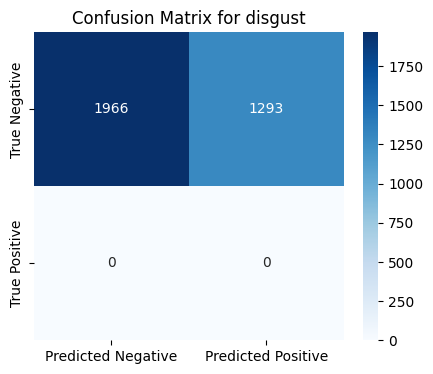

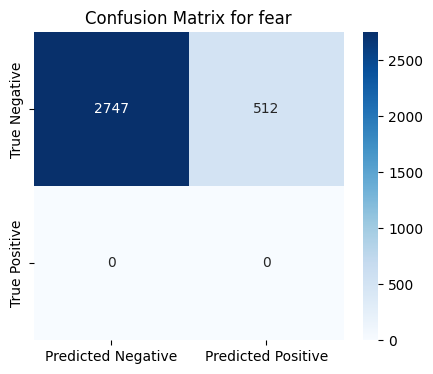

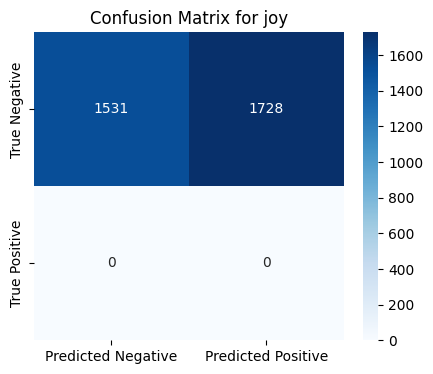

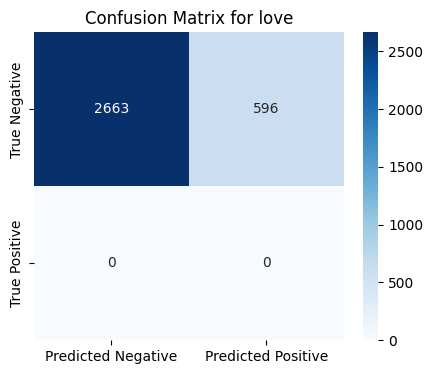

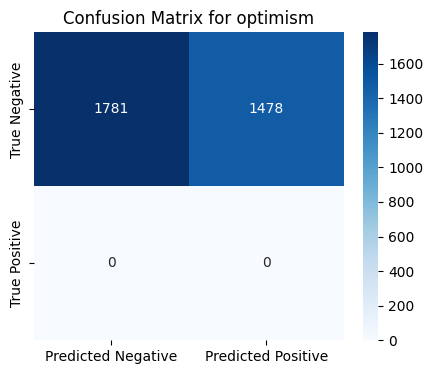

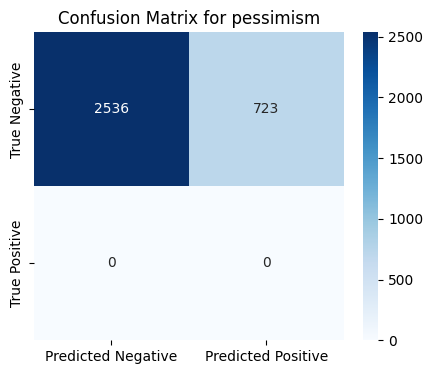

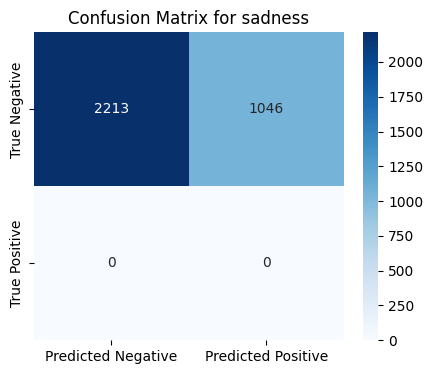

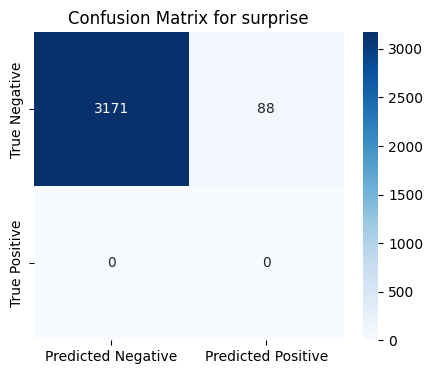

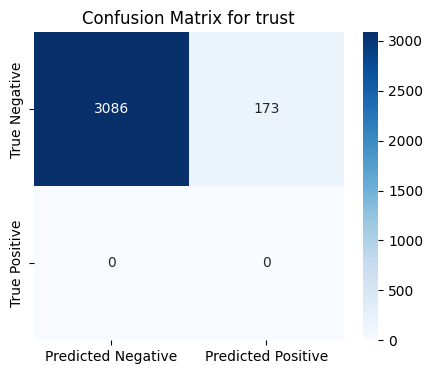

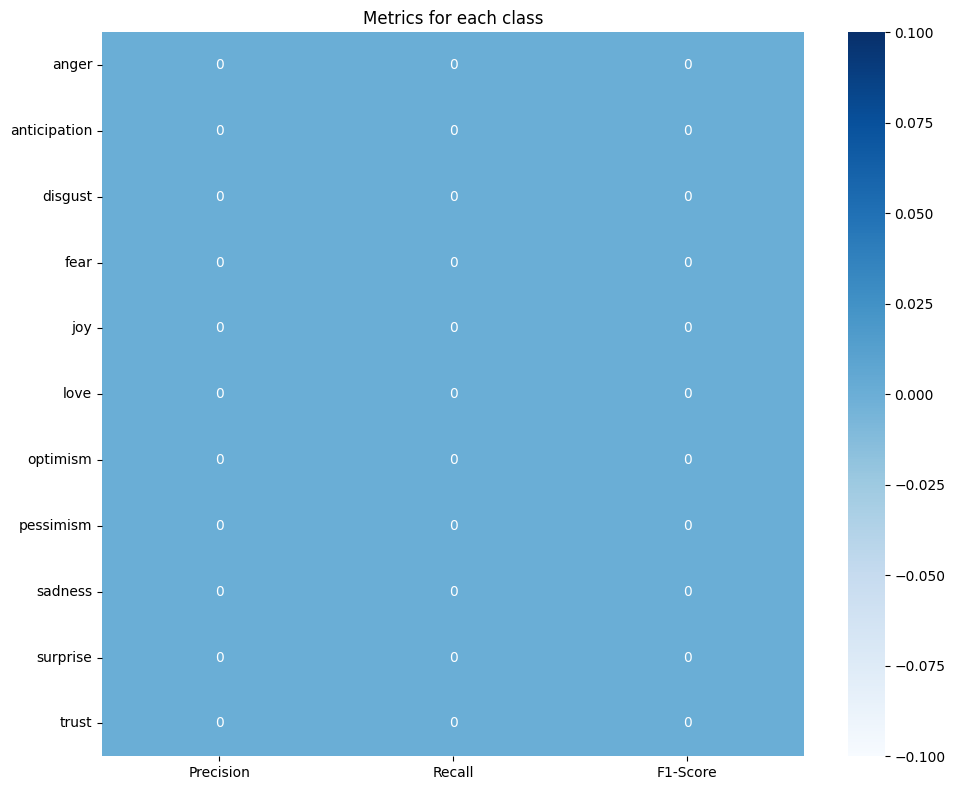

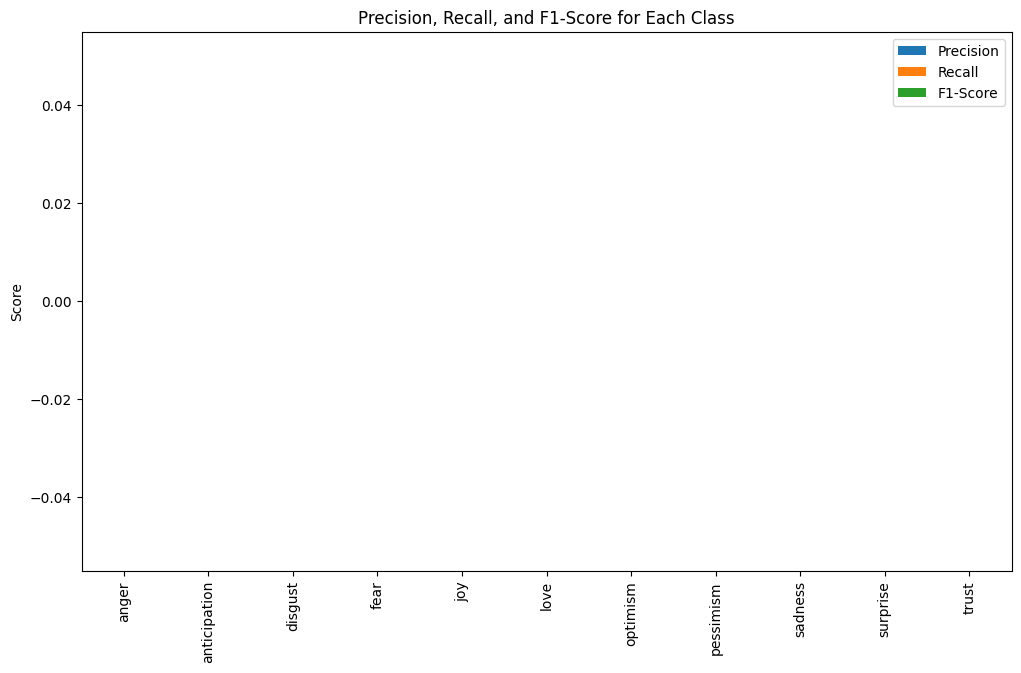

In [87]:
# Sample data
y_true = test_labels
y_pred = test_preds
class_names = labels

mcm = multilabel_confusion_matrix(y_true, y_pred,)

# 1. Individual Heatmaps
for idx, matrix in enumerate(mcm):
    plt.figure(figsize=(5, 4))
    sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues',
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['True Negative', 'True Positive'])
    plt.title(f'Confusion Matrix for {class_names[idx]}')
    plt.show()

# 2. Aggregate Metrics Heatmap
precision_per_class = precision_score(y_true, y_pred, average=None)
recall_per_class = recall_score(y_true, y_pred, average=None)
f1_per_class = f1_score(y_true, y_pred, average=None)

metrics_df = pd.DataFrame({
    'Precision': precision_per_class,
    'Recall': recall_per_class,
    'F1-Score': f1_per_class
}, index=class_names)

plt.figure(figsize=(10, 8))
# sns.heatmap(metrics_df, annot=True, cmap='Blues')
# plt.title('Metrics for each class')
# plt.show()

ax = sns.heatmap(metrics_df, annot=True, cmap='Blues')
plt.title('Metrics for each class')
plt.tight_layout()  # Adjust layout to not cut off edges

# Log the heatmap to wandb
wandb.log({"Metrics Heatmap": wandb.Image(ax.get_figure())})
plt.show()

# 3. Histogram of Metrics
metrics_df.plot(kind='bar', figsize=(12, 7))
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score for Each Class')
plt.show()

In [88]:
wandb.finish()

eval/accuracy,▂▁▃▃▄▄▆▅▇▇▇▆█▇▆▆▇▆▇▇▇▇▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▆
eval/f1_macro,▁▃▆▆█▇▆▇█▇▆▇▇▆▇▇▅▅▆▆▆▆▆▆▆▆▅▆▆▆▅▆▆▅▅▅▆▆▅█
eval/f1_micro,▁▃▅▅▇▇▇▆▇▇▇▇█▇▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆█
eval/loss,▂▂▁▁▁▁▁▁▁▂▂▂▂▃▄▃▄▅▅▅▆▆▆▆▇▇▇▇▇▇█████████▁
eval/runtime,▁▃▃▃▃▃▃▃▃▄▃▃▃▃▃▄▄▄▄▄▄▄▄▄▄▄▃▃▃▃▃▃▄▃▃█▃▃▄▃
eval/samples_per_second,█▅▆▆▆▆▆▆▆▅▆▆▆▆▆▅▅▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▅▅▆▁▆▆▅▆
eval/steps_per_second,█▅▆▆▆▆▆▆▆▅▆▆▆▆▆▅▅▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▅▅▆▁▆▆▅▆
eval_accuracy,▁
eval_f1_macro,▁
eval_f1_micro,▁
eval_loss,▁


##Load Results

In [89]:
%cd /content/drive/MyDrive/data/datasets/HW 5

/content/drive/MyDrive/data/datasets/HW 5


In [90]:
# Assuming the file path is correct, and you have mounted your Google Drive
df_test = pd.read_csv("test.csv")

In [91]:
df_test

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2018-01559,@Adnan__786__ @AsYouNotWish Dont worry Indian ...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
1,2018-03739,"Academy of Sciences, eschews the normally sobe...",NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
2,2018-00385,I blew that opportunity -__- #mad,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3,2018-03001,This time in 2 weeks I will be 30... 😥,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
4,2018-01988,#Deppression is real. Partners w/ #depressed p...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,2018-03848,shaft abrasions from panties merely shifted to...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3255,2018-00416,@lomadia heard of Remothered? Indie horror gam...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3256,2018-03717,All this fake outrage. Y'all need to stop 🤣,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3257,2018-03504,Would be ever so grateful if you could record ...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE


In [92]:
# Assuming 'test_preds' contains the predicted values (0 or 1) for each emotion
# Assuming 'class_names' contains the list of emotion class names

# Iterate over each emotion class name
for label in class_names:
    # Replace 'NONE' values with the predicted binary values from test_preds
    df_test[label] = test_preds[:, class_names.index(label)]

# Drop the 'Tweet' column
df_test.drop(columns=['Tweet'], inplace=True)

In [93]:
# Save the updated DataFrame to a new CSV file
#df_test.to_csv('predicted_emotions_test_gemma1.csv', index=False)

# Export to CSV
df_test.to_csv('/content/drive/MyDrive/predicted_emotions_test_gemma_ia3.csv', index=False)

print("Predicted emotions saved to predicted_emotions_test_gemma_ia3.csv")

Predicted emotions saved to predicted_emotions_test_gemma_ia3.csv


##Model Inference

In [94]:
from transformers import pipeline

checkpoint = str(model_folder/f'checkpoint-{best_model_checkpoint_step}')
custom_pipeline = pipeline(
    task="text-classification",
    model=checkpoint,
    tokenizer=checkpoint)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of GemmaForSequenceClassification were not initialized from the model checkpoint at google/gemma-1.1-2b-it and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Test the pipeline on a single example**

In [95]:
sample = testset['test']['texts'][0]
preds = custom_pipeline(sample)
preds

[{'label': 'LABEL_0', 'score': 0.9684145450592041}]

**Test the pipeline on a large dataset**

In [96]:
predictions = custom_pipeline(testset['test']['texts'], truncation=True)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [97]:
predictions[0:10]

[{'label': 'LABEL_0', 'score': 0.9684145450592041},
 {'label': 'LABEL_0', 'score': 0.8180840015411377},
 {'label': 'LABEL_0', 'score': 0.9265932440757751},
 {'label': 'LABEL_0', 'score': 0.8212134838104248},
 {'label': 'LABEL_0', 'score': 0.9828317761421204},
 {'label': 'LABEL_0', 'score': 0.636986255645752},
 {'label': 'LABEL_0', 'score': 0.9160763025283813},
 {'label': 'LABEL_0', 'score': 0.8866109251976013},
 {'label': 'LABEL_0', 'score': 0.928786039352417},
 {'label': 'LABEL_0', 'score': 0.9538499712944031}]